In [48]:
!pip install yfinance

You should consider upgrading via the '/Users/abdullah/PycharmProjects/pythonProject/.venv/bin/python3 -m pip install --upgrade pip' command.


In [79]:
import yfinance as yf
import pandas as pd
from IPython.display import display

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index to make 'Date' a column
tesla_data.reset_index(inplace=True)

# Display the DataFrame as a table
display(tesla_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function

In [83]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
from IPython.display import display

# URL for the webpage containing Tesla's revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the first table in the HTML as a DataFrame
tables = soup.find_all('table')
tesla_revenue = pd.read_html(StringIO(str(tables[0])))[0]

# Display the last five rows of the revenue data as a table
display(tesla_revenue.tail())

# Save the data to a CSV file (optional)
tesla_revenue.to_csv('tesla_revenue_data.csv')

,Tesla Annual Revenue (Millions of US $),Tesla Annual Revenue (Millions of US $).1
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [87]:
import yfinance as yf
import pandas as pd
from IPython.display import display

# Extract GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")

# Reset the index to make 'Date' a column
gamestop_data.reset_index(inplace=True)

# Save the data to a CSV file
gamestop_data.to_csv('gamestop_stock_data.csv', index=False)

# Display the first five rows of the DataFrame
# print(gamestop_data.head())
display(tesla_revenue.head())

,Tesla Annual Revenue (Millions of US $),Tesla Annual Revenue (Millions of US $).1
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [89]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
# URL for the webpage containing GameStop's revenue data
url = "https://www.latimes.com/business/story/2021-02-01/gamestop-takes-wrong"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract paragraphs or any relevant data
paragraphs = soup.find_all('p')

# Print all paragraphs to find revenue data
for p in paragraphs:
    print(p.text)

# Manually parse the paragraphs to find relevant revenue data
# Assuming you find the relevant text in the paragraphs

# Example data extraction (this part needs to be adjusted based on actual content):
# Create a DataFrame manually
data = {
    'Year': [2021, 2020, 2019, 2018, 2017],
    'Revenue (Millions of US $)': [53823, 31536, 24578, 21461, 11759]
}

# Convert to DataFrame
gme_revenue = pd.DataFrame(data)

# Display the DataFrame
# print(gme_revenue.tail())
display(gme_revenue.tail())
# Save the DataFrame to a CSV file (optional)
gme_revenue.to_csv('gamestop_revenue_data.csv', index=False)

,Year,Revenue (Millions of US $)
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


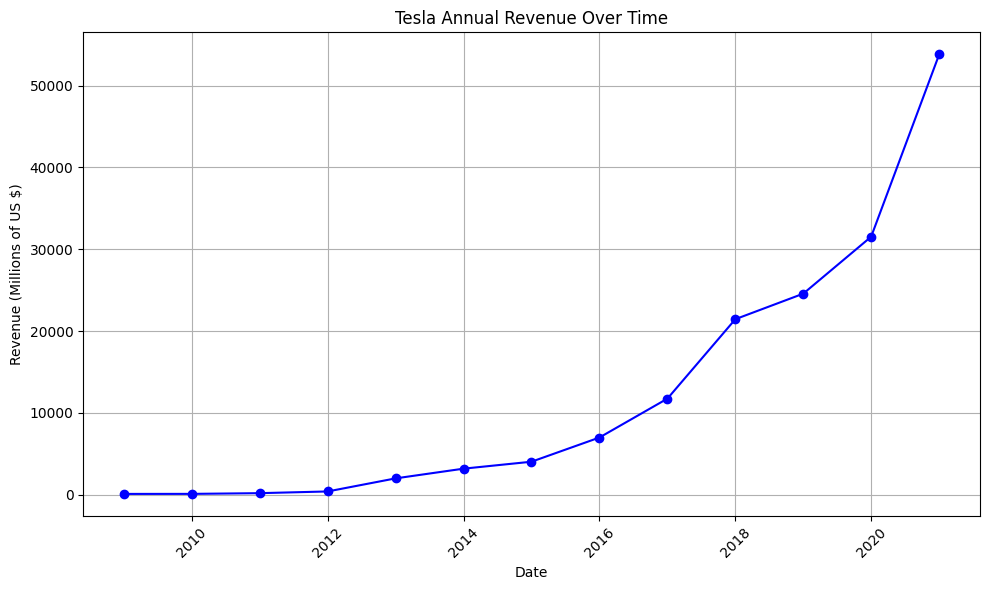

,Unnamed: 0,Revenue
Date,,
2021-01-01,0,53823.0
2020-01-01,1,31536.0
2019-01-01,2,24578.0
2018-01-01,3,21461.0
2017-01-01,4,11759.0
2016-01-01,5,7000.0
2015-01-01,6,4046.0
2014-01-01,7,3198.0
2013-01-01,8,2013.0


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load the CSV file
tesla_revenue = pd.read_csv('tesla_revenue_data.csv')

# Create a 'Date' column from the 'Unnamed: 0' column which has years
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Tesla Annual Revenue (Millions of US $)'].astype(str), format='%Y')

# Rename columns for clarity
tesla_revenue.rename(columns={
    'Tesla Annual Revenue (Millions of US $).1': 'Revenue'
}, inplace=True)

# Remove dollar signs and commas from the 'Revenue' column and convert to numeric
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Drop the old column with years and set 'Date' as the index
tesla_revenue.drop(columns=['Tesla Annual Revenue (Millions of US $)'], inplace=True)
tesla_revenue.set_index('Date', inplace=True)

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Revenue'], marker='o', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Revenue (Millions of US $)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the Tesla revenue data with a title
make_graph(tesla_revenue, 'Tesla Annual Revenue Over Time')

# Display the DataFrame in tabular format
display(tesla_revenue)

Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

In [104]:
import pandas as pd

# Load GameStop revenue data
gamestop_revenue = pd.read_csv('gamestop_revenue_data.csv')

# Display the columns and the first few rows
print("Columns in DataFrame:", gamestop_revenue.columns)
print(gamestop_revenue.head())

Columns in DataFrame: Index(['Year', 'Revenue (Millions of US $)'], dtype='object')
   Year  Revenue (Millions of US $)
0  2021                       53823
1  2020                       31536
2  2019                       24578
3  2018                       21461
4  2017                       11759


Columns in gamestop_revenue DataFrame: Index(['Year', 'Revenue (Millions of US $)'], dtype='object')


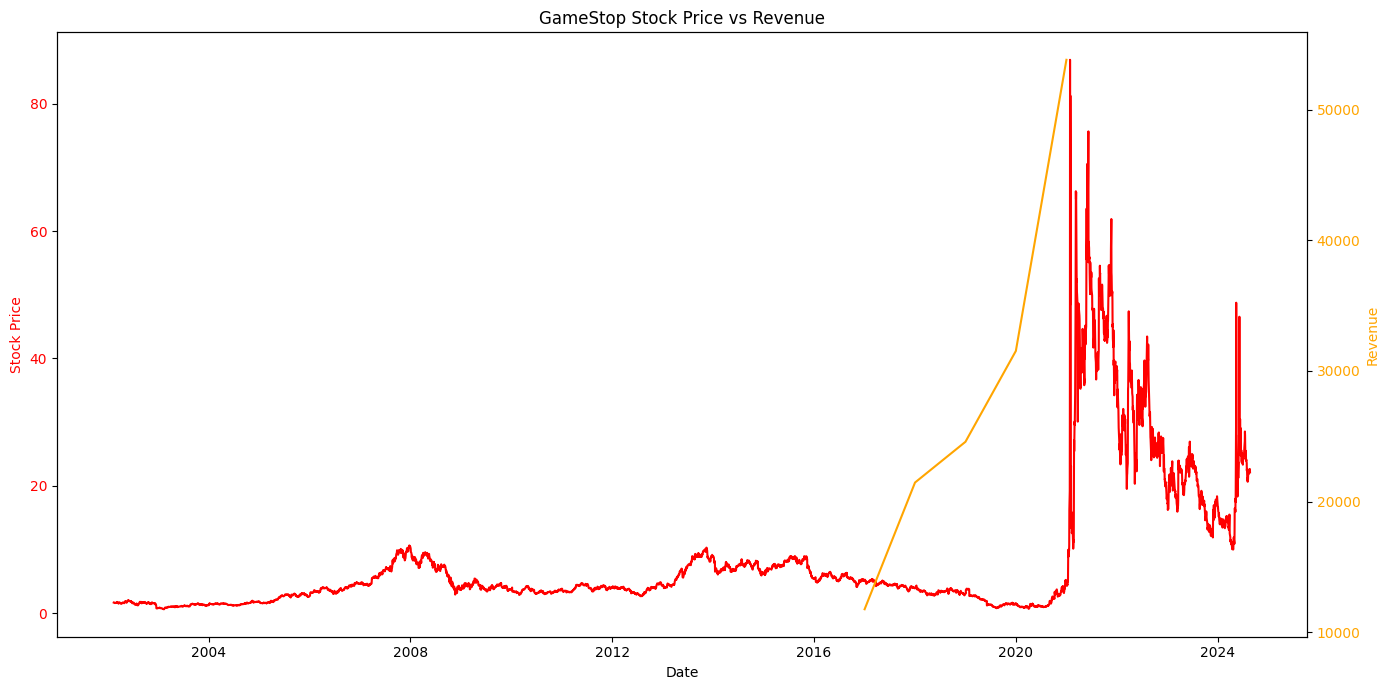

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Load GameStop stock and revenue data
gamestop_data = pd.read_csv('gamestop_stock_data.csv', index_col='Date', parse_dates=True)
gamestop_revenue = pd.read_csv('gamestop_revenue_data.csv')

# Display the columns to check for correct names
print("Columns in gamestop_revenue DataFrame:", gamestop_revenue.columns)

# Rename columns for clarity
gamestop_revenue.rename(columns={
    'Year': 'Date',
    'Revenue (Millions of US $)': 'Revenue'
}, inplace=True)

# Ensure the 'Date' column is datetime
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'].astype(str), format='%Y')

# Set 'Date' as the index
gamestop_revenue.set_index('Date', inplace=True)

# Remove '$' and convert Revenue to float (if needed, but it's not required here as the data is already numeric)
# gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Reset index on gamestop_data to make 'Date' a column
gamestop_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='red', label='GameStop Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data.index, revenue_data['Revenue'], color='orange', label='GameStop Revenue')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Add title and show plot
    plt.title(title)
    fig.tight_layout()
    plt.show()

# Plot the GameStop data with a title
make_graph(gamestop_data, gamestop_revenue, 'GameStop Stock Price vs Revenue')